## Lab 6 - Frequency

This lab must be done **individually**. The required packages have been imported for you below.

In [1]:
import string
import numpy as np
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt

Load text file. Data from Project Gutenberg (https://www.gutenberg.org/).

In [2]:
txt = open("ulysses.txt","r")

Remove punctuations in text.

In [3]:
remove = dict.fromkeys(map(ord, string.punctuation))

Collapse tokens to lower case.

In [4]:
txt = txt.read().translate(remove).lower()

Construct a dictionary where `key` = word, `value` = count (or frequency).

In [5]:
wordfreq = {}
for word in txt.split():
    if word not in wordfreq:
        wordfreq[word] = 1
    else:
        wordfreq[word] += 1

**Hint**: Print `wordfreq` to see what this dictionary contains.

To work with keys and values in dictionaries, you may refer to https://docs.python.org/2/tutorial/datastructures.html.
Alternatively, refer to the Python tutorial posted on course syllabus.

In this lab, you will reconstruct the classic work by Zipf (1949) on the properties of word frequency---read Zipf's chapter posted. Following these instructions and enjoy this final lab of the course!

### Task 1 [2 pts]

**Hint**: For how to `sort` and use `list` comprehension in Python, see the Python tutorial posted on course syllabus.

**Task 1a**: Construct an array of sorted word frequency of all words, and a separate array of word lengths.

In [65]:
# Write your code here.

# Extract frequency from dict and convert to list
wordfreq_list = list(map(lambda x: [x, wordfreq[x]] , wordfreq.keys()))

# Construct sorted word frequency list
sorted_wf_all = sorted(wordfreq_list, key=lambda x: x[1], reverse=True)
sorted_wf = [i[1] for i in sorted_wf_all]
print('Sorted word Frequency List: {}'.format(sorted_wf[:10]))

sorted_wf_len = [len(i[0]) for i in sorted_wf_all]
print('Length of sorted words by their frequencies: {}'.format(sorted_wf_len[:10]))

Sorted word Frequency List: [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557]
Length of sorted words by their frequencies: [3, 2, 3, 1, 2, 2, 2, 3, 4, 4]


**Task 1b**: Construct an array of ranks from on the sorted frequency array in **Task 1a** (using ordinal rank).

In [67]:
# Write your code here.
rank = [i for i in range(1, len(sorted_wf) + 1)]
print ("Word rank list: ", rank[:10])

Word rank list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Task 1c**: Print the most frequent 20 words and their frequencies. **[1pt]**

In [73]:
# Write your code here.
sorted_wf_words = [i[0] for i in sorted_wf_all]
print('Most frequent 20 words: {}'.format(sorted_wf_words[:20]))
print('Their frequencies: {}'.format(sorted_wf[:20]))

Most frequent 20 words: ['the', 'of', 'and', 'a', 'to', 'in', 'he', 'his', 'that', 'with', 'i', 'it', 'was', 'on', 'for', 'you', 'her', 'him', 'is', 'all']
Their frequencies: [15010, 8250, 7216, 6512, 5031, 4974, 3998, 3327, 2586, 2557, 2553, 2351, 2126, 2119, 1950, 1914, 1783, 1522, 1435, 1329]


### Task 2 [3 pts]

Produce a 2-by-2 set of subplots using `subplot`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

**Task 2a**: Scatter plot word frequency (y-axis) against rank (x-axis). **[.5pt]**

**Task 2b**: Scatter plot $log(freq)$ against $log(rank)$. **[.5pt]**

**Task 2c**: Calculate and report the slope from **Task 2b** (via linear regression), i.e. slope of $log(freq)$ vs $log(rank)$. **[.5pt]**

**Task 2d**: Scatter plot frequency against word length. **[.5pt]**

**Task 2e**: Scatter plot $log(freq)$ against word length. **[.5pt]**

The slope for logarithmic rank line is:  -1.0332621845538867
The slope for logarithmic frequency line is:  -0.9375752989297238


Text(0, 0.5, 'Log Frequency')

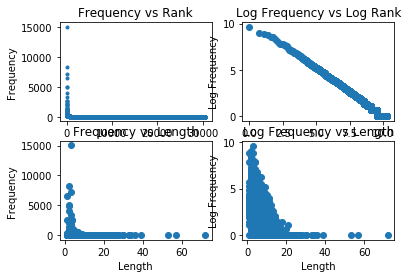

In [105]:
from math import log

# Task 2a
# Write your code here.
plt.subplot(2, 2, 1)
plt.scatter(rank, sorted_wf, marker='.')
plt.title("Frequency vs Rank")
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Task 2b
# Write your code here.
log_rank = [log(x) for x in rank]
log_freq = [log(x) for x in sorted_wf]
plt.subplot(2, 2, 2)
plt.scatter(log_rank, log_freq)
plt.title("Log Frequency vs Log Rank")
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')


# Task 2c
# Write your code here.
linefit = np.polyfit(log_rank, log_freq, 1) # 1 degree, straight line
slope = linefit[0]
print ("The slope for logarithmic rank line is: ", slope)

linefit_two = np.polyfit(log_freq, log_rank, 1)
slope = linefit_two[0]
print ("The slope for logarithmic frequency line is: ", slope)
    
# Task 2d
# Write your code here.
plt.subplot(2, 2, 3)
plt.scatter(sorted_wf_len, sorted_wf)
plt.title("Frequency vs Length")
plt.xlabel('Length')
plt.ylabel('Frequency')


# Task 2e
# Write your code here.
plt.subplot(2, 2, 4)
log_sorted_wf = [log(x) for x in sorted_wf]
plt.scatter(sorted_wf_len, log_sorted_wf)
plt.title("Log Frequency vs Length")
plt.xlabel('Length')
plt.ylabel('Log Frequency')


### Task 3 [1 pt]

Calculate and report the Pearson correlation between $log(freq)$ and word length. **[.5pt]**

**Hint**: You may use `scipy.stats.pearsonr`; the first output is Pearson correlation.

In [108]:
# Write your code here.
pearson = pearsonr(log_sorted_wf, sorted_wf_len)
corr = pearson[0]
print ("Pearson Correlation. {} ".format(corr))
print("")

Pearson Correlation. -0.3111938895177389 


### Task 4 [5 pts]

**Task 4a**: Calculate and report the expected word length of English words based on the given data. **[1pt]**

$E[len] = \sum^{i} len(i) * prob(i)$, where $prob(i)$ = normalized frequency of word $i$ (over all available words).

In [11]:
# Write your code here.

**Task 4b**: Perform a shuffled (permutation) test with 1000 shuffled trials. **[1pt]**

In [53]:
# Write your code here.

**Task 4c**: Based on the shuffled trials, histogram the expected word lengths from the shuffled data. **[.5pt]**

In [1]:
# Write your code here.

**Task 4d**: Calculate and report the _p-value_ from the shuffled test. 

The null hypothesis is that the expected word length is no different from the expected length from shuffled data. 
Based on the _p-value_ you have obtained, conclude whether the null should be rejected $(p<0.05)$. **[.5pt]**

In [55]:
# Write your code here.

**Task 5**: Propose an alternative way of mapping words to frequencies and show that it produces a lower expected length than the empirical value you calculated, justify your proposal, and print the top 20 most frequent words under this proposal. **[3pts]**

In [2]:
# Write your solution here.

Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 